In [2]:
# Debug packages
from rich.traceback import install; install()
%load_ext autoreload
%autoreload 2

# External packages
import numpy as np
import matplotlib.pyplot as plt 

from matplotlib import cm

# Internal packages
from peak_over_threshold.dspot import DriftStreamingPeakOverThreshold

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load the data
data = np.load("../data/example.npy")
print(f"Data shape: {data.shape}")

Data shape: (21915,)


In [19]:
# Run the SPOT algorithm
threshold = DriftStreamingPeakOverThreshold(
    data=data,
    num_init=1000,
    depth=100,
    num_candidates=10,
    risk=5e-4,
    init_level=0.98,
    epsilon=1e-8,
)

/home/cbhua/github/peak-over-threshold/src/peak_over_threshold/utils/cal_threshold.py:31: UserWarning: gamma is zero, the threshold is calculated by the original formula
  warn("gamma is zero, the threshold is calculated by the original formula")


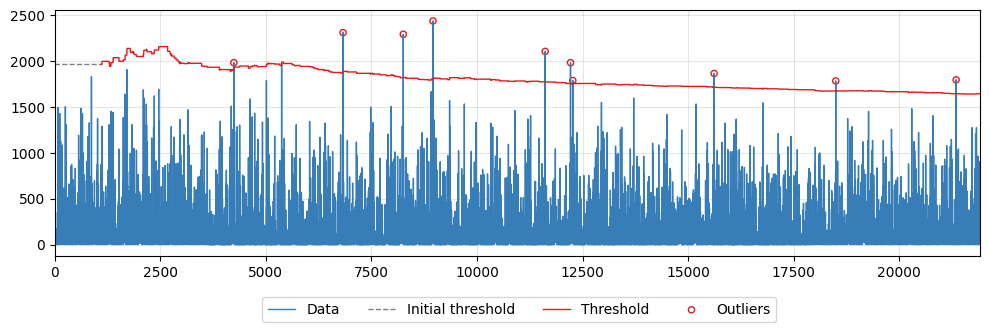

In [23]:
fig, ax = plt.subplots(1, figsize=(10, 3))

# Plot the data
ax.plot(data, label="Data", color=cm.Set1(1), lw=1)

# Plot the initial threshold
# NOTE: 1000 + 10 == num_init + depth
ax.plot(threshold[:1000+100], color="gray", ls="--", lw=1, label="Initial threshold")

# Plot the threshold
ax.plot(np.arange(1000+100, len(data)), threshold[1000+100:], color=cm.Set1(0), ls="-", lw=1, label="Threshold")

# Scatter all outliers
outliers = data[data > threshold]
ax.scatter(
    np.arange(len(data))[data > threshold],
    outliers,
    facecolor="none",
    edgecolor=cm.Set1(0),
    s=20,
    label="Outliers",
)

# Legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', ncol=4, bbox_to_anchor=(0.26, -0.05))

# Configs
ax.grid(axis='both', color='black', alpha=0.1)
ax.set_xlim(0, len(data))

plt.tight_layout()
# plt.savefig("../figs/dspot_demo.png", dpi=300)